In [35]:
import pandas as pd
data = pd.read_csv("sensor_data_200.txt", delimiter=" ",
                   header=None, names=("date", "time", "ir", "lidar"))

In [36]:
print(data["lidar"][0:8])

0    214
1    211
2    199
3    208
4    212
5    212
6    215
7    218
Name: lidar, dtype: int64


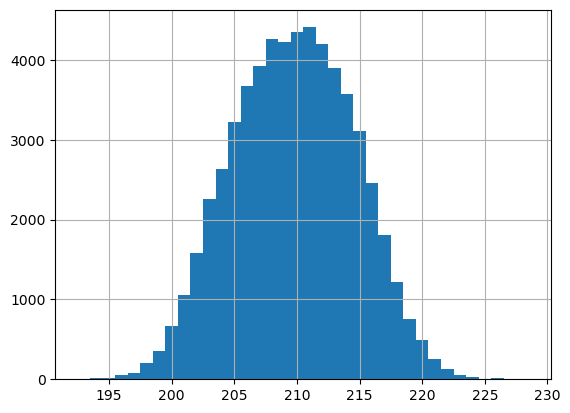

In [37]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),align='left')
plt.show()

In [38]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()

print(mean1,mean2)

209.73713297619855 209.73713297619855


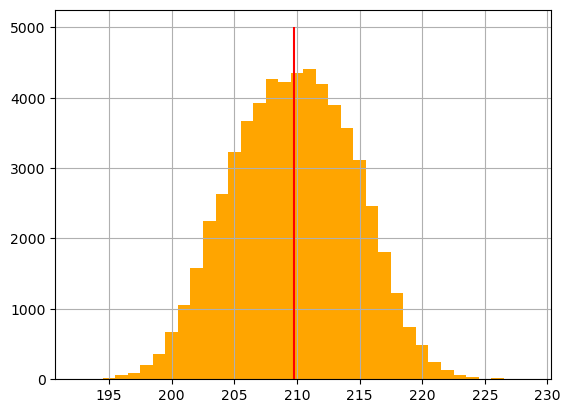

In [39]:
data["lidar"].hist(bins = max(data["lidar"]) - min(data["lidar"]),color="orange",align='left')
plt.vlines(mean1,ymin=0,ymax=5000,color="red")
plt.show()

In [40]:
# 定義から計算
zs = data["lidar"].values
mean = sum(zs)/len(zs)
diff_square = [(z-mean)**2 for z in zs]

sampling_var = sum(diff_square)/(len(zs))   # 標本分散
unbiased_var = sum(diff_square)/(len(zs)-1) # 不偏分散

print(sampling_var)
print(unbiased_var)

# Pandasを使用
pandas_sampling_var = data["lidar"].var(ddof = 0)   # 標本分散
pandas_default_var = data["lidar"].var()            # デフォルト（不偏分散）

print(pandas_sampling_var)
print(pandas_default_var)

# NumPyを使用
import numpy as np

numpy_default_var = np.var(data["lidar"])               # デフォルト（標本分散）
numpy_unbiased_var = np.var(data["lidar"], ddof = 1)    # 不偏分散

print(numpy_default_var)
print(numpy_unbiased_var)


23.407709770274106
23.40810659855441
23.407709770274106
23.40810659855441
23.407709770274106
23.40810659855441


In [41]:
import math

# 定義から計算
stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

# Pandasを使用
pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)



4.838151482774605
4.83819249292072
4.83819249292072


In [42]:
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs["probs"] = freqs["lidar"]/len(data["lidar"])
freqs.transpose() # 横ベクトルにした

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


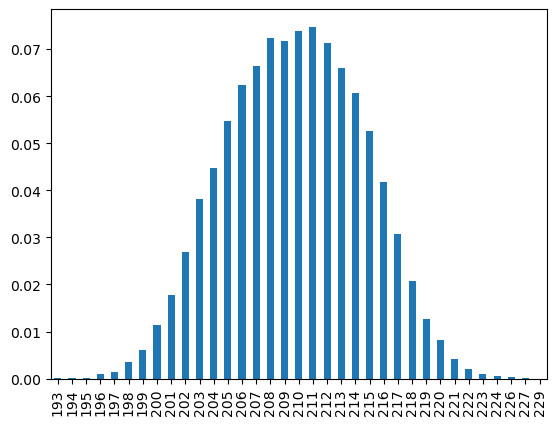

In [46]:
sum(freqs["probs"])
freqs["probs"].sort_index().plot.bar()
plt.show()

In [51]:
def drawing():
    return freqs.sample(n=1, weights="probs").index[0]

drawing()

215

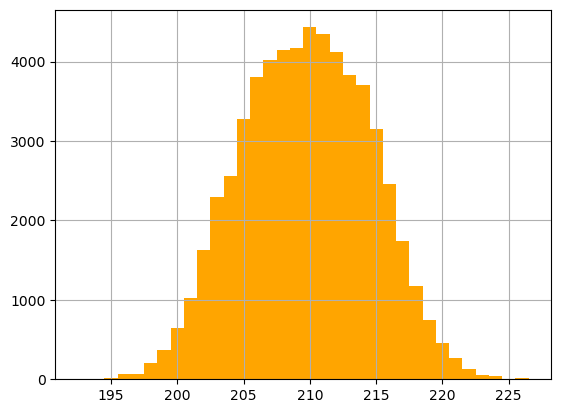

In [54]:
samples = [drawing() for i in range(len(data))]
#samples = [drawing() for i in range(1000)]
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins = max(p)-min(p), color="orange", align='left')
plt.show()